<a href="https://colab.research.google.com/github/randreove/TS/blob/main/notebooks/60_Forecasting%20II%20Deep%20Learning/0_Overview/A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Long Short Term Memory (LSTM) Neural Networks

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow
import keras
import pandas as pd


<module 'keras.layers' from '/Users/sota/miniconda3/envs/work/lib/python3.12/site-packages/keras/layers/__init__.py'>

<img width="500" src="https://www.tensorflow.org/static/tutorials/structured_data/time_series_files/output_JjEkt488hi8I_0.png"/>

Source: https://www.tensorflow.org/tutorials/structured_data/time_series#performance

## Load Dataset

In [4]:
import pandas as pd

df = pd.read_csv('../data/precio_mercado_diario.csv', parse_dates=['datetime_utc'], index_col=0)
df = df.loc["2020":].copy()
df

FileNotFoundError: [Errno 2] No such file or directory: '../data/precio_mercado_diario.csv'

## Data Preprocessing

Mercado SPOT
datetime_utc                           
2020-01-01 00:00:00+00:00      0.055143
2020-01-01 01:00:00+00:00      0.052214
...                                 ...
2023-08-04 20:00:00+00:00      0.134286
2023-08-04 21:00:00+00:00      0.131000

[31558 rows x 1 columns]

### Create Sequences. Why?

#### Feature Selection (X,y) in Conventional Machine Learning

speeding  alcohol  not_distracted  no_previous  ins_premium  \
abbrev                                                                
AL         7.332    5.640          18.048       15.040       784.55   
AK         7.421    4.525          16.290       17.014      1053.48   
...          ...      ...             ...          ...          ...   
WI         4.968    4.554           5.382       11.592       670.31   
WY         7.308    5.568          14.094       15.660       791.14   

        ins_losses  
abbrev              
AL          145.08  
AK          133.93  
...            ...  
WI          106.62  
WY          122.04  

[51 rows x 6 columns]

accidents
abbrev           
AL           18.8
AK           18.1
...           ...
WI           13.8
WY           17.4

[51 rows x 1 columns]

#### Feature Selection (X,y) in Neural Networks

Mercado SPOT
datetime_utc                           
2020-01-01 00:00:00+00:00      0.055143
2020-01-01 01:00:00+00:00      0.052214
...                                 ...
2023-08-04 20:00:00+00:00      0.134286
2023-08-04 21:00:00+00:00      0.131000

[31558 rows x 1 columns]

<center>
    
[10, 20, 30, 40, 50, 60, 70, ...]

</center>

---

Hour | X | y
-|-|-
4 | [10, 20, 30] | [40]
5 | [20, 30, 40] | [50]
6 | [30, 40, 50] | [60]
... | ... | ...

#### Timestamp 1

Mercado SPOT
datetime_utc                           
2020-01-01 00:00:00+00:00      0.055143
2020-01-01 01:00:00+00:00      0.052214
2020-01-01 02:00:00+00:00      0.046171

Mercado SPOT    0.044071
Name: 2020-01-01 03:00:00+00:00, dtype: float64

#### Timestamp 2

Mercado SPOT
datetime_utc                           
2020-01-01 01:00:00+00:00      0.052214
2020-01-01 02:00:00+00:00      0.046171
2020-01-01 03:00:00+00:00      0.044071

Mercado SPOT    0.043057
Name: 2020-01-01 04:00:00+00:00, dtype: float64

## Modelling

### Design NN Architecture

/Users/sota/miniconda3/envs/work/lib/python3.12/site-packages/keras/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Train Model

Epoch 1/50



  1/395 ━━━━━━━━━━━━━━━━━━━━ 3:06 474ms/step - loss: 0.0341


 53/395 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 0.0165  


117/395 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 0.0114


193/395 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - loss: 0.0085


268/395 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 0.0070


339/395 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - loss: 0.0061


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0055 - val_loss: 0.0010


Epoch 2/50



  1/395 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0012


 74/395 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 7.8218e-04


149/395 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 7.7306e-04


222/395 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 7.6302e-04


291/395 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 7.5352e-04


365/395 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 7.4579e-04


395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - loss: 7.4277e-04 - val_loss: 9.4580e-04


Epoch 3/50



  1/395 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 6.9377e-04


 76/395 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - loss: 6.8557e-04


153/395 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - loss: 6.7045e-04


230/395 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 6.5770e-04


306/395 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 6.4371e-04


382/395 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 6.3516e-04


395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 6.3390e-04 - val_loss: 7.7811e-04


Epoch 4/50



  1/395 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 3.3064e-04


 76/395 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 4.8284e-04


151/395 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 4.8705e-04


228/395 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 4.8473e-04


305/395 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 4.8006e-04


382/395 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 4.7679e-04


395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 4.7611e-04 - val_loss: 5.7936e-04


Epoch 5/50



  1/395 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 3.0210e-04


 77/395 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 3.4539e-04


155/395 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - loss: 3.4822e-04


234/395 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 3.4980e-04


311/395 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 3.4796e-04


387/395 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 3.4482e-04


395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 3.4443e-04 - val_loss: 4.3058e-04


Epoch 6/50



  1/395 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 2.4133e-04


 78/395 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 3.0808e-04


153/395 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - loss: 3.1430e-04


229/395 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - loss: 3.0893e-04


304/395 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 3.0414e-04


381/395 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 3.0038e-04


395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 2.9969e-04 - val_loss: 4.1072e-04


Epoch 7/50



  1/395 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 3.3982e-04


 75/395 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 2.7917e-04


152/395 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 2.6893e-04


228/395 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 2.6690e-04


304/395 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 2.6678e-04


381/395 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - loss: 2.6671e-04


395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 2.6665e-04 - val_loss: 3.5894e-04


Epoch 8/50



  1/395 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.3601e-04


 76/395 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 2.4618e-04


151/395 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 2.5282e-04


227/395 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 2.5408e-04


302/395 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 2.5514e-04


378/395 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - loss: 2.5494e-04


395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - loss: 2.5485e-04 - val_loss: 3.7035e-04


Epoch 9/50



  1/395 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 3.4707e-04


 78/395 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - loss: 2.5515e-04


153/395 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 2.5116e-04


229/395 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 2.4781e-04


305/395 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 2.4668e-04


383/395 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 2.4563e-04


395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 2.4548e-04 - val_loss: 3.3999e-04


Epoch 10/50



  1/395 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.8350e-04


 76/395 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 2.3476e-04


151/395 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 2.3087e-04


229/395 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 2.2879e-04


306/395 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 2.2820e-04


384/395 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - loss: 2.2898e-04


395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 2.2920e-04 - val_loss: 3.2644e-04


Epoch 11/50



  1/395 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.1994e-04


 77/395 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 2.2539e-04


153/395 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 2.2351e-04


229/395 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 2.2433e-04


305/395 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 2.2587e-04


380/395 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 2.2721e-04


395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 2.2760e-04 - val_loss: 3.2928e-04


Epoch 12/50



  1/395 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.1508e-04


 76/395 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 2.5112e-04


150/395 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 2.4746e-04


226/395 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 2.4267e-04


301/395 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 2.4065e-04


377/395 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - loss: 2.3936e-04


395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 2.3912e-04 - val_loss: 3.4115e-04


Epoch 13/50



  1/395 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 3.4436e-04


 76/395 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 2.0260e-04


152/395 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 2.1097e-04


228/395 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 2.1746e-04


297/395 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 2.2224e-04


372/395 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 2.2518e-04


395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - loss: 2.2590e-04 - val_loss: 3.2312e-04


Epoch 14/50



  1/395 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 2.4022e-04


 75/395 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 2.1147e-04


152/395 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 2.2122e-04


227/395 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 2.2528e-04


304/395 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 2.2694e-04


381/395 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 2.2773e-04


395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 2.2790e-04 - val_loss: 3.3733e-04


Epoch 15/50



  1/395 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.6190e-04


 77/395 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 2.2128e-04


155/395 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 2.2287e-04


230/395 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - loss: 2.2379e-04


303/395 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 2.2507e-04


380/395 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 2.2736e-04


395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 2.2764e-04 - val_loss: 3.2439e-04


Epoch 16/50



  1/395 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 3.6730e-04


 75/395 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 2.3693e-04


152/395 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 2.3178e-04


228/395 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 2.2957e-04


304/395 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 2.2908e-04


378/395 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 2.2939e-04


395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 2.2949e-04 - val_loss: 3.1982e-04


Epoch 17/50



  1/395 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 8.4458e-05


 77/395 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - loss: 2.1291e-04


154/395 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 2.2074e-04


231/395 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - loss: 2.2445e-04


308/395 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - loss: 2.2653e-04


384/395 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - loss: 2.2748e-04


395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 2.2759e-04 - val_loss: 3.1882e-04


Epoch 18/50



  1/395 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.5486e-04


 76/395 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 2.2446e-04


152/395 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 2.3430e-04


230/395 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - loss: 2.3455e-04


307/395 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 2.3404e-04


381/395 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 2.3331e-04


395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 2.3324e-04 - val_loss: 3.2892e-04


Epoch 19/50



  1/395 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2.9242e-04


 75/395 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 2.2619e-04


152/395 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 2.3119e-04


227/395 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 2.2831e-04


303/395 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 2.2764e-04


378/395 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 2.2854e-04


395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 2.2879e-04 - val_loss: 3.1903e-04


Epoch 20/50



  1/395 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 2.4040e-04


 73/395 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - loss: 2.2093e-04


148/395 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - loss: 2.3136e-04


222/395 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 2.3200e-04


297/395 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 2.3178e-04


372/395 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 2.3127e-04


395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - loss: 2.3120e-04 - val_loss: 3.1677e-04


Epoch 21/50



  1/395 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.4632e-04


 77/395 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 2.1689e-04


154/395 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - loss: 2.2063e-04


232/395 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 2.2368e-04


308/395 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - loss: 2.2625e-04


384/395 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - loss: 2.2833e-04


395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 2.2849e-04 - val_loss: 3.1307e-04


Epoch 22/50



  1/395 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 8.5501e-05


 72/395 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 2.5608e-04


148/395 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 2.4466e-04


224/395 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 2.4070e-04


301/395 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - loss: 2.3865e-04


376/395 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - loss: 2.3723e-04


395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 2.3693e-04 - val_loss: 3.1474e-04


Epoch 23/50



  1/395 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.3519e-04


 77/395 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 2.1640e-04


155/395 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 2.1691e-04


232/395 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 2.2000e-04


309/395 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 2.2317e-04


376/395 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 2.2479e-04


395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - loss: 2.2504e-04 - val_loss: 3.1170e-04


Epoch 24/50



  1/395 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.6441e-04


 74/395 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 2.2937e-04


149/395 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 2.3387e-04


225/395 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 2.3229e-04


300/395 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 2.3106e-04


376/395 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 2.3052e-04


395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 2.3046e-04 - val_loss: 3.2095e-04


Epoch 25/50



  1/395 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2.4768e-04


 77/395 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 2.3557e-04


153/395 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 2.3915e-04


228/395 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 2.3742e-04


304/395 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 2.3584e-04


376/395 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 2.3482e-04


395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - loss: 2.3458e-04 - val_loss: 3.2145e-04


Epoch 26/50



  1/395 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 4.0400e-04


 76/395 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 2.4968e-04


150/395 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 2.4182e-04


226/395 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 2.3920e-04


299/395 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 2.3788e-04


369/395 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 2.3666e-04


395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - loss: 2.3623e-04 - val_loss: 3.1499e-04


### Calculate Predictions


  1/198 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step


151/198 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step


198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step


198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step


/Users/sota/Library/CloudStorage/Dropbox/2 Business/1 Datons/2 Areas/Courses/22 TS/solutions-new/notebooks/60_Forecasting II Deep Learning/0_Overview/../utils.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index = pd.date_range(start=date_start, end=date_end, freq='H')


y_true    y_pred  y_pred_scaled_inverse  \
2022-11-15 01:00:00+00:00  0.129086  0.125618              87.932899   
2022-11-15 02:00:00+00:00  0.128500  0.129593              90.714798   
...                             ...       ...                    ...   
2023-08-04 20:00:00+00:00  0.134286  0.139155              97.408806   
2023-08-04 21:00:00+00:00  0.131000  0.135120              94.584251   

                           Mercado SPOT  
2022-11-15 01:00:00+00:00         90.36  
2022-11-15 02:00:00+00:00         89.95  
...                                 ...  
2023-08-04 20:00:00+00:00         94.00  
2023-08-04 21:00:00+00:00         91.70  

[6309 rows x 4 columns]

### Evaluate Model

12.370280717726288

### Visualize Model Predictions

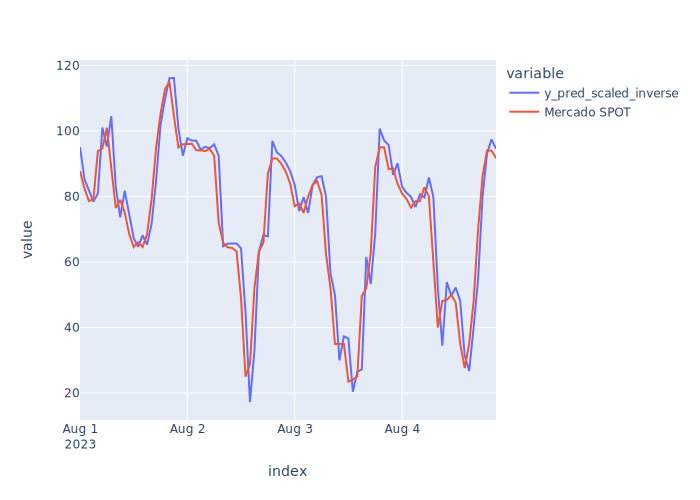